# Experimento con un perceptrón

Miguel A. Gutiérrez Naranjo

Versión del 16 de diciembre de 2024
<hr style="border:2px solid gray"> </hr>

En este fichero vamos a realizar un pequeño experimento para ver cómo funciona el algoritmo de entrenamiento de un perceptrón con la función umbral

In [47]:
import numpy as np
import random,math

import matplotlib as mpl
import matplotlib.animation
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
mpl.rcParams['figure.figsize'] = (10,6) # Para el tamaño de la imagen
from matplotlib import rcParams
rcParams['animation.embed_limit'] = 100  # Cambia el límite a 100 MB
from IPython.display import HTML

Para nuestro experimento, en primer lugar creamos una nube de puntos aleatoria

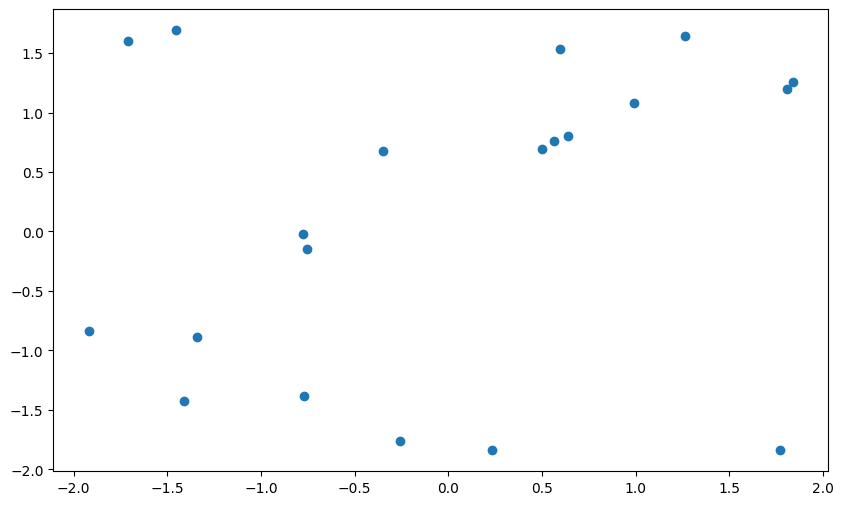

In [32]:
R = 2  # Las coordenadas están entre -R y R
N = 20 # Número de puntos

Xs = np.random.uniform(-R,R,N)
Ys = np.random.uniform(-R,R,N)

plt.scatter(Xs,Ys)
plt.show()

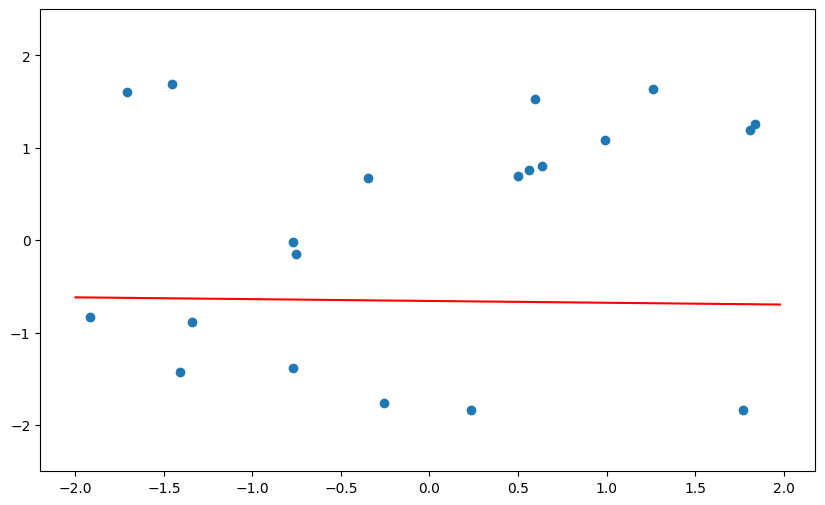

In [33]:
# Elegimos una recta para separar los puntos
# Elegimos la pendiente m y el corte con el eje de abcisas b

b = random.uniform(-R,R)
m = math.tan(random.uniform(0,2*math.pi))

recta_xx = np.arange(-R,R,R/100)
recta_yy = m*recta_xx +b

fig, ax = plt.subplots()
ax.set_ylim(-R-0.5,R+0.5)
plt.scatter(Xs,Ys)
plt.plot(recta_xx,recta_yy,c='red')
plt.show()

Vamos a separar esa nube de puntos en dos clases: Los puntos que están en el semiplano positivo tomarán valor de clasificación 1 y los que están en el semiplano negativo clasificación 0.

In [34]:
clasif = np.array([1 if m*x - y + b > 0 else 0 for (x,y) in zip(Xs,Ys) ])

Podemos ver la clasificación de los primeros puntos

In [35]:
clasif[:10]

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1])

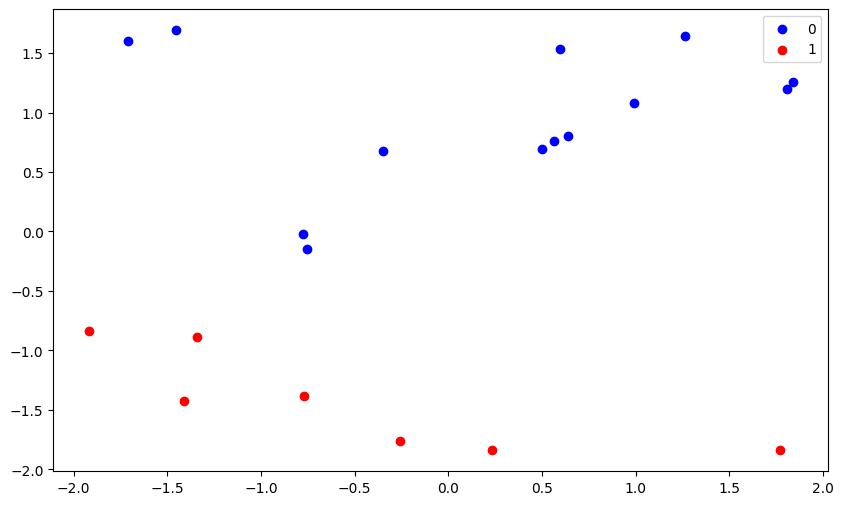

In [36]:
# Dibujamos ahora la nube diferenciando los valores de clasificación

plt.scatter(Xs[clasif==0],Ys[clasif==0],c ='blue',label='0')
plt.scatter(Xs[clasif==1],Ys[clasif==1],c ='red',label='1')
plt.legend()
plt.show()

A continuación implementamos el algoritmo de entrenamiento. El código ha sido desglosado para poder seguir los pasos.

In [37]:
# Factor de aprendizaje
eta = 0.01

# Función umbral
def umbral(x):
    if x > 0:
        return 1
    else:
        return 0

# Modificación de los pesos usando el i-ésimo ejemplo

def una_modificación(pesos,i):
    [w0,w1,w2] = pesos
    o = umbral(-w0 + (w1 * Xs[i]) + (w2 * Ys[i]))
    nw_0 = w0 + eta * (clasif[i] - o) * -1
    nw_1 = w1 + eta * (clasif[i] - o) * Xs[i]
    nw_2 = w2 + eta * (clasif[i] - o) * Ys[i]
    return [nw_0,nw_1,nw_2]

# Recorremos todos los ejemplos del conjunto de entrenamiento
# Si no ha habido modificaciòn de los pesos, entonces el
# algoritmo debe parar (nueva_convergencia = 1)
def un_batch(lista_pesos,convergencia):
    inicial = lista_pesos[-1]
    pesos_actual = inicial
    num = len(Xs)
    for i in range(num):
        nuevos_pesos = una_modificación(pesos_actual,i)
        lista_pesos += [nuevos_pesos]
        pesos_actual = nuevos_pesos
    final = lista_pesos[-1]
    if inicial == final:
        nueva_convergencia = 1
    else:
        nueva_convergencia = 0
    return lista_pesos,nueva_convergencia

# Para que el algoritmo no tarde demasiado, restringimos los
# valores iniciales dentro de un margen
margen = 0.1

# cota es el número máximo de iteraciones (epochs) permitidas.
# Si no ese alcanza la convergencia para tras alcanzar la cota.

def entrenamiento(cota):
    convergencia = 0
    contador = 0
    w0 = random.uniform(m-margen,m+margen)
    w1 = random.uniform(-1 - margen,-1 + margen)
    w2 = random.uniform(b-margen,b+margen)
    lista_pesos = [[w0,w1,w2]]
    while convergencia == 0 and contador < cota:
        nlp,nc = un_batch(lista_pesos,convergencia)
        convergencia = nc
        lista_pesos = nlp
        contador += 1
    if convergencia == 1:
        print('SI hay convergencia')
    else:
        print('NO hay convergencia')
    return lista_pesos

Lanzamos el algoritmo y guardamos la lista de pesos obtendos en la variable *param*

In [44]:
param = entrenamiento(30)

SI hay convergencia


Podemos los primeros elementos de la lista de pesos

In [45]:
param[:5]

[[-0.08085861041005168, -1.0680600780604435, -0.6028086008837517],
 [-0.08085861041005168, -1.0680600780604435, -0.6028086008837517],
 [-0.09085861041005168, -1.050330393316042, -0.6211584959412694],
 [-0.08085861041005168, -1.0332591427156776, -0.6372004883855399],
 [-0.08085861041005168, -1.0332591427156776, -0.6372004883855399]]

Podemos ver cómo evoluciona la sucesión de rectas obtenidas con el algoritmo.

In [48]:
fig, ax = plt.subplots()

ax.scatter(Xs[clasif==0],Ys[clasif==0],c ='blue',label='0')
ax.scatter(Xs[clasif==1],Ys[clasif==1],c ='red',label='1')
ax.legend()

def recta(x,w0,w1,w2):
    l = []
    for item in x:
        l.append(((-w1/w2)*item+(w0/w2)))
    return l

w0_init = param[0][0]
w1_init = param[0][1]
w2_init = param[0][2]

num = len(param)

xx = np.arange(-R, R, 0.05)
line, = ax.plot(xx, recta(xx,w0_init,w1_init,w2_init))

ax.set_ylim([-R,R])

def animate(i):
    w0 = param[i][0]
    w1 = param[i][1]
    w2 = param[i][2]
    line.set_ydata(recta(xx,w0,w1,w2))  # actualiza los datos
    return line,

ani = matplotlib.animation.FuncAnimation(fig, animate,repeat = False,frames=num)

HTML(ani.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

Podemos representar cada terna de pesos como un punto en ${\mathbb R}^3$ y ver cómo se desplaza en el espacio.

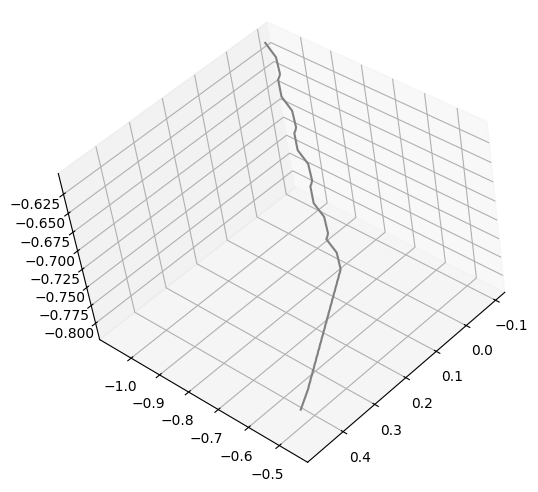

In [49]:
fig = plt.figure()

Xs = [x[0] for x in param]
Ys = [x[1] for x in param]
Zs = [x[2] for x in param]

ax = plt.axes(projection='3d')

ax.plot3D(Xs, Ys, Zs, 'gray')

ax.azim = 50
ax.roll = 10
ax.elev = 40
plt.show()